# 데이터셋 & 데이터로더 불러오기

In [1]:
import torch
import torch.nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import torch.optim
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
train_data=datasets.MNIST('DeepLearningVision\data',True,transforms.ToTensor(),
                       None,True)

test_data=datasets.MNIST('DeepLearningVision\data',False,transforms.ToTensor(),
                       None,True)

# 데이터셋의 클래스 객체 저장
classes=train_data.classes

# train_data 데이터셋 정보를 확인 (dir(train_data))
print(f'train_data의 개수: {len(train_data)}')
print(f'test_data의 개수: {len(test_data)}')
print(f'train_data[0]: {train_data[0]}') # 튜플 (배열,클래스넘버)
print(f'train_data[0].shape:{train_data[0][0].shape}') # 배열의 shape
print(f'train_data[0][0]의 자료형: {type(train_data[0][0])}') # torch.Tensor형

# 데이터셋을 BATCH_SIZE (SGD:Stochastic Gradient Descent) 스토캐스택 경사하강법을 하기 위한 DataLoader 생성
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           shuffle=False,
                           batch_size=32)
print(f'torch_version:{torch.__version__}')
# dataloader의 기능 function 확인 (class method, attribution)
print(dir(train_dataloader))
print(f'train_dataloader: {next(iter(train_dataloader))[0].shape}')
print(f'train_dataloader의 개수: {len(train_dataloader)}') # 60000 // 32


c:\Users\hyssk\anaconda3\envs\pytorch_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


train_data의 개수: 60000
test_data의 개수: 10000
train_data[0]: (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

# Diagnosic 코드

In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
# class 배열 저장하기
dataset_classes=train_data.classes
dataset_classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

# 모델 생성 CNN(Lenet-5보다 깊은 모델)

In [4]:
from torch import nn
from torch.nn import Softmax
torch.random.seed()
torch.cuda.random.seed()
class CNNModel(nn.Module):
    def __init__(self,input_shape:int, output_shape:int, hidden_units:int):
        '''
        Args:
            input_shape: 이미지 컬러 채널
            output_shape: 출력 클래스의 개수
            hiddent_units: HyperParameter (사용자 정의)

        Returns:
            Model that you define
        '''
        super().__init__()
        self.block1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=0),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25)
        )
        self.block2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=0),
            nn.ReLU(),          
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*4*4,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self,x):
        x=self.block1(x)
        #print(f'x.shape: {x.shape}')
        x=self.block2(x)
        #print(f'x.shape: {x.shape}')
        x=self.classifier(x)
        #print(f'x.shape: {x.shape}')
        return x

CnnModel=CNNModel(1,len(dataset_classes),64).to(device)
CnnModel

CNNModel(
  (block1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [5]:
from torchsummary import summary
summary(CnnModel,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]             640
              ReLU-2           [-1, 64, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          36,928
              ReLU-4           [-1, 64, 24, 24]               0
         MaxPool2d-5           [-1, 64, 12, 12]               0
           Dropout-6           [-1, 64, 12, 12]               0
            Conv2d-7           [-1, 64, 10, 10]          36,928
              ReLU-8           [-1, 64, 10, 10]               0
            Conv2d-9             [-1, 64, 8, 8]          36,928
             ReLU-10             [-1, 64, 8, 8]               0
        MaxPool2d-11             [-1, 64, 4, 4]               0
          Dropout-12             [-1, 64, 4, 4]               0
          Flatten-13                 [-1, 1024]               0
           Linear-14                   

# Optimizer와 Loss Function 정하기

In [6]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
optimizer=Adam(params=CnnModel.parameters(),lr=0.1)
loss_fn=CrossEntropyLoss()

# 모델 학습하는데 걸리는 시간 측정을 위한 함수
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device:torch.device="cuda"):
  """Prints difference between start and end time."""
  total_time=end-start
  print(f"{device}상에서 걸린 학습시간: {total_time:.3f} seconds")
  return total_time


# MNIST 데이터셋에 대한 Lenet5 이상 업그레이드된 모델 학습

In [7]:
# acc 평가
def accuracy_fn(prediction,true):
    correct=torch.eq(prediction,true).sum().item()
    acc=(correct/len(true))*100
    return acc

start_time=timer()
train_acc_list=[]
train_loss_list=[]
test_loss_list=[]
test_acc_list=[]
EPOCH=15 # 60000개의 데이터에 대한 훑고감 정도? 10번 시행
for epoch in tqdm(range(EPOCH)):
    train_loss=0
    train_acc=0
    for Batch,(x_train,y_train) in enumerate(train_dataloader):
        CnnModel.train(True)
        x_train,y_train=x_train.to(device),y_train.to(device)
        # Do forward pass (로짓 계산)
        y_logits=CnnModel(x_train)
        # Calculate loss (손실 계산)
        loss=loss_fn(y_logits,y_train)
        train_loss+=loss
        # acc 계산
        train_acc+=accuracy_fn(y_logits.argmax(dim=1),y_train)
        # optimizer zero grad (경사 추적 x)
        optimizer.zero_grad()
        # loss backward (역전파를 통한 gradient 구하기)
        loss.backward()
        # optimizer step (가중치 갱신)
        optimizer.step()
    train_loss/=len(train_dataloader)
    train_acc/=len(train_dataloader)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f' train_loss: {train_loss}')
    # Evaluation
    test_loss=0.0
    test_acc=0.0
    CnnModel.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            X_test,y_test=X_test.to(device),y_test.to(device)
            # Forward Pass
            test_logits=CnnModel(X_test)
            # 손실 계산
            test_loss+=loss_fn(test_logits,y_test)
        test_acc+=accuracy_fn(test_logits.argmax(dim=1),y_test)
        test_loss /= len(train_dataloader)
        test_acc_list.append(test_acc)
        test_loss_list.append(test_loss)
    print(f"Train_Loss: {train_loss:.2f}, Train_acc: {train_acc:.2f}, Test_Loss: {test_loss:.2f}, Test_Acc: {test_acc:.2f}")
end_time=timer()
print_train_time(start_time,end_time)

  0%|          | 0/15 [00:00<?, ?it/s]

 train_loss: 23.222061157226562


  7%|▋         | 1/15 [00:14<03:17, 14.08s/it]

Train_Loss: 23.22, Train_acc: 10.34, Test_Loss: 0.39, Test_Acc: 12.50
 train_loss: 2.3151776790618896


 13%|█▎        | 2/15 [00:27<03:00, 13.85s/it]

Train_Loss: 2.32, Train_acc: 10.12, Test_Loss: 0.39, Test_Acc: 6.25
 train_loss: 2.3133456707000732


 20%|██        | 3/15 [00:41<02:47, 13.99s/it]

Train_Loss: 2.31, Train_acc: 10.28, Test_Loss: 0.38, Test_Acc: 12.50
 train_loss: 2.313333511352539


 27%|██▋       | 4/15 [00:56<02:38, 14.39s/it]

Train_Loss: 2.31, Train_acc: 10.27, Test_Loss: 0.39, Test_Acc: 12.50
 train_loss: 2.3139984607696533


 33%|███▎      | 5/15 [01:11<02:24, 14.48s/it]

Train_Loss: 2.31, Train_acc: 10.41, Test_Loss: 0.38, Test_Acc: 12.50
 train_loss: 2.313217878341675


 40%|████      | 6/15 [01:26<02:11, 14.63s/it]

Train_Loss: 2.31, Train_acc: 10.28, Test_Loss: 0.38, Test_Acc: 12.50
 train_loss: 2.3130321502685547


 47%|████▋     | 7/15 [01:41<01:58, 14.85s/it]

Train_Loss: 2.31, Train_acc: 10.45, Test_Loss: 0.39, Test_Acc: 12.50
 train_loss: 2.31396484375


 53%|█████▎    | 8/15 [01:57<01:45, 15.01s/it]

Train_Loss: 2.31, Train_acc: 10.21, Test_Loss: 0.39, Test_Acc: 12.50
 train_loss: 2.313577175140381


 60%|██████    | 9/15 [02:12<01:31, 15.24s/it]

Train_Loss: 2.31, Train_acc: 10.16, Test_Loss: 0.39, Test_Acc: 6.25
 train_loss: 2.313223361968994


 67%|██████▋   | 10/15 [02:28<01:17, 15.46s/it]

Train_Loss: 2.31, Train_acc: 10.14, Test_Loss: 0.39, Test_Acc: 12.50
 train_loss: 2.3132693767547607


 73%|███████▎  | 11/15 [02:44<01:02, 15.66s/it]

Train_Loss: 2.31, Train_acc: 10.42, Test_Loss: 0.39, Test_Acc: 12.50
 train_loss: 2.313669443130493


 80%|████████  | 12/15 [03:01<00:48, 16.00s/it]

Train_Loss: 2.31, Train_acc: 10.12, Test_Loss: 0.39, Test_Acc: 6.25
 train_loss: 2.317392110824585


 87%|████████▋ | 13/15 [03:18<00:32, 16.34s/it]

Train_Loss: 2.32, Train_acc: 10.35, Test_Loss: 0.39, Test_Acc: 12.50
 train_loss: 2.312445640563965


 93%|█████████▎| 14/15 [03:36<00:16, 16.80s/it]

Train_Loss: 2.31, Train_acc: 10.39, Test_Loss: 0.39, Test_Acc: 6.25
 train_loss: 2.314305543899536


100%|██████████| 15/15 [03:54<00:00, 15.64s/it]

Train_Loss: 2.31, Train_acc: 10.24, Test_Loss: 0.39, Test_Acc: 6.25
cuda상에서 걸린 학습시간: 234.623 seconds


234.6229427

# 성능 평가

In [8]:
# plot을 위한 item()

train_loss_list=[i.item() for i in train_loss_list]
test_loss_list=[i.item() for i in test_loss_list]

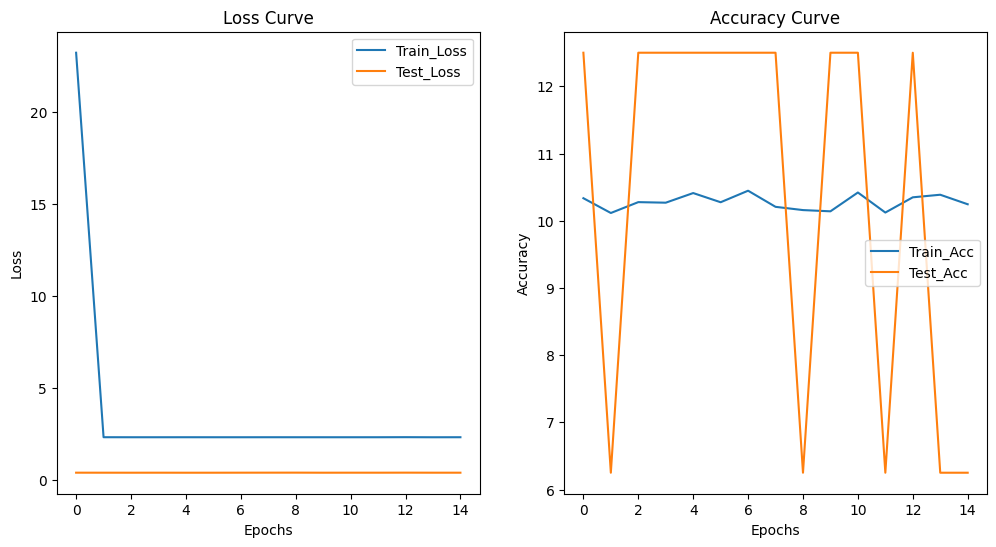

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(train_loss_list,label='Train_Loss')
plt.plot(test_loss_list,label='Test_Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_acc_list,label='Train_Acc')
plt.plot(test_acc_list,label='Test_Acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.show()

# Prediction (예측) 실험 평가

In [10]:
from torchvision.io import read_image
import cv2 as cv
test_image=cv.imread(r'C:\Users\hyssk\Myopencv\DeepLearningVision\MNIST\숫자3.jpg',0)
print(test_image)

None
